In [5]:
import ScraperFC as src
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import seaborn as sns

#este codigo escrapea la pagina de sofascore

#ideal crear set de datos propios para no depender

C:\Users\eriki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
src = src.Sofascore()

In [7]:
src

In [8]:
data = src.scrape_league_stats('23/24','EPL')
data

End of the pages


,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,blockedShots,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team
0,4,7,1,69,56.10,23,71.88,20,80.00,36,...,8,10.81,0,6,2.39,1,2,1,Rodri,Manchester City
1,3,2,0,61,55.96,1,16.67,16,48.48,15,...,6,10.71,0,1,2.84,0,1,1,James Maddison,Tottenham Hotspur
2,1,1,0,5,100.00,2,28.57,0,0.00,1,...,0,100.00,0,0,0.11,0,0,0,Ivan Toney,Brentford
3,5,0,0,64,59.81,3,20.00,24,70.59,14,...,11,18.52,0,1,3.00,0,0,0,Michael Olise,Crystal Palace
4,14,2,0,48,34.53,4,26.67,17,32.69,13,...,13,21.54,2,8,14.27,0,0,2,Mohamed Salah,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0.00,0,0,0.00,0,0,0,Amadou Diallo,Newcastle United
14,0,0,0,0,0.00,0,0.00,0,0.00,0,...,0,0.00,0,0,0.00,0,0,0,Michael Ndiweni,Newcastle United
15,0,0,0,2,100.00,0,0.00,0,0.00,2,...,0,0.00,0,0,0.00,0,0,0,Tawanda Chirewa,Wolverhampton
16,0,0,0,0,0.00,1,100.00,0,0.00,0,...,0,0.00,0,0,0.00,0,0,0,Jamie Donley,Tottenham Hotspur


In [9]:
data.columns

Index(['goals', 'yellowCards', 'redCards', 'groundDuelsWon',
       'groundDuelsWonPercentage', 'aerialDuelsWon',
       'aerialDuelsWonPercentage', 'successfulDribbles',
       'successfulDribblesPercentage', 'tackles', 'assists',
       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',
       'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances',
       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',
       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',
       'accurateCrossesPercentage', 'accurateLongBalls',
       'accurateLongBallsPercentage', 'interceptions', 'clearances',
       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',
       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',
       'expectedGoals

In [10]:
data.to_csv()

",goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,assists,accuratePassesPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,wasFouled,fouls,dispossessed,appearances,saves,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,highClaims,successfulRunsOut,punches,runsOut,accurateFinalThirdPasses,bigChancesCreated,accuratePasses,keyPasses,accurateCrosses,accurateCrossesPercentage,accurateLongBalls,accurateLongBallsPercentage,interceptions,clearances,dribbledPast,bigChancesMissed,totalShots,shotsOnTarget,blockedShots,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team\r\n0,4,7,1,69,56.1,23,71.88,20,80.0,36,3,93.15,92,59.35,1453,14,26,13,17,0,0,0,17,1,0,0,0,0,477,3,1685,20,0,0.0,128,82.05,16,18,11,2,37,13,8,10.81,0,6,2.39,1,2,1,Rodri,Manchester City\

In [11]:
df = src.scrape_league_stats('23/24','EPL',accumulation='per90')
df.head()

End of the pages


,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,successfulDribblesPercentage,tackles,...,blockedShots,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team
0,0.25,0.43,0.06,4.27,56.10,1.42,71.88,1.24,80.00,2.23,...,0.50,10.81,0.0,0.37,0.15,0.06,0.12,0.06,Rodri,Manchester City
1,0.30,0.20,0.00,6.18,55.96,0.10,16.67,1.62,48.48,1.52,...,0.61,10.71,0.0,0.10,0.29,0.00,0.10,0.10,James Maddison,Tottenham Hotspur
2,1.00,1.00,0.00,5.00,100.00,2.00,28.57,0.00,0.00,1.00,...,0.00,100.00,0.0,0.00,0.11,0.00,0.00,0.00,Ivan Toney,Brentford
3,0.67,0.00,0.00,8.53,59.81,0.40,20.00,3.20,70.59,1.87,...,1.47,18.52,0.0,0.13,0.40,0.00,0.00,0.00,Michael Olise,Crystal Palace
4,0.72,0.10,0.00,2.48,34.53,0.21,26.67,0.88,32.69,0.67,...,0.67,21.54,0.1,0.41,0.74,0.00,0.00,0.10,Mohamed Salah,Liverpool


<Axes: xlabel='team'>

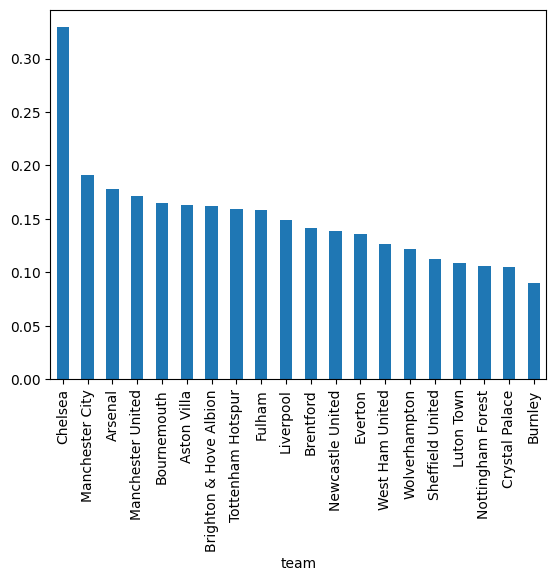

In [12]:
grafo = df.groupby('team').expectedGoals.mean().sort_values(ascending=False)
grafo.plot.bar()

In [13]:
#eliminar al link original el texto "id:" https://www.sofascore.com/es/millonarios-junior-barranquilla/fxcsrxc#id:11913838
link = 'https://www.sofascore.com/es/millonarios-junior-barranquilla/fxcsrxc#11913838'
win = src.match_momentum(link)

<BarContainer object of 28 artists>

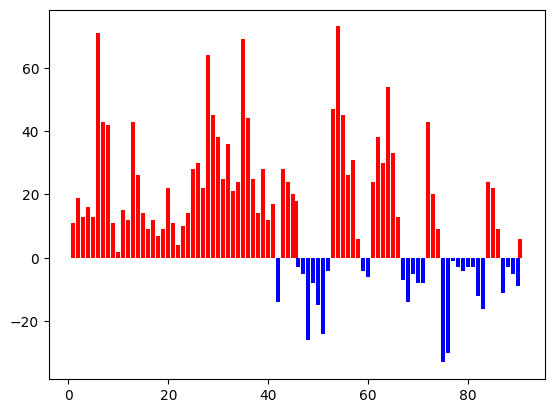

In [14]:
win_local = win[win['value'] > 0]
win_visitante = win[win['value'] < 0]

plt.bar(win_local.minute , win_local.value,color='red')
plt.bar(win_visitante.minute , win_visitante.value,color='blue')

In [15]:
dato_partido = src.get_general_match_stats(link)
dato_partido



,name,home,homeValue,homeTotal,away,awayValue,awayTotal
0,Ball possession,45%,45,NaN,55%,55,NaN
0,Total shots,17,17,NaN,3,3,NaN
1,Shots on target,8,8,NaN,1,1,NaN
2,Shots off target,6,6,NaN,0,0,NaN
3,Blocked shots,3,3,NaN,2,2,NaN
0,Corner kicks,7,7,NaN,1,1,NaN
1,Offsides,1,1,NaN,2,2,NaN
2,Fouls,6,6,NaN,4,4,NaN
3,Yellow cards,4,4,NaN,4,4,NaN
4,Free kicks,4,4,NaN,6,6,NaN


In [16]:
src.get_team_names(link)

('Millonarios', 'Junior Barranquilla')

In [17]:
jugadores = src.get_players_match_stats(link)
jugadores[0]

,name,slug,shortName,position,jerseyNumber,userCount,id,country,marketValueCurrency,dateOfBirthTimestamp,...,onTargetScoringAttempt,blockedScoringAttempt,totalOffside,shotOffTarget,wasFouled,goalAssist,bigChanceCreated,goals,captain,team
0,Álvaro Montero,alvaro-montero,Á. Montero,G,31,279,926238,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,796435200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
1,Delvin Alfonzo,alfonzo-delvin,D. Alfonzo,D,22,69,1015685,"{'alpha2': 'VE', 'name': 'Venezuela'}",EUR,968025600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
2,Andrés Llinás,andres-llinas,A. Llinás,D,26,180,982821,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,859248000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
3,Jorge Arias,jorge-arias,J. Arias,D,17,50,355842,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,721612800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
4,Danovis Banguero,danovis-banguero,D. Banguero,D,20,43,34090,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,625449600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
5,Edgar Guerra,edgar-guerra,E. Guerra,M,15,47,1068525,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,984096000,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Millonarios
6,Daniel Giraldo,daniel-giraldo,D. Giraldo,M,8,43,1136107,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,709948800,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,Millonarios
7,Stiven Vega,stiven-vega,S. Vega,M,28,70,590354,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,895795200,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Millonarios
8,David Macalister Silva,david-macalister-silva,D. M. Silva,M,14,220,822108,"{'alpha2': 'CO', 'name': 'Colombia'}",EUR,534816000,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,True,Millonarios
9,Santiago Giordana,santiago-giordana,S. Giordana,F,32,120,789880,"{'alpha2': 'AR', 'name': 'Argentina'}",EUR,799459200,...,5.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,Millonarios


,name,firstName,lastName,slug,shortName,position,jerseyNumber,userCount,id,fieldTranslations,averageX,averageY,pointsCount,team
0,Jhon Largacha,Jhon Largacha,,jhon-largacha,J. Largacha,F,42,4,1478310,NaN,69.500000,40.600000,1,Millonarios
1,Óscar Vanegas,NaN,NaN,oscar-vanegas,Ó. Vanegas,D,6,26,1015630,NaN,16.725000,35.850000,4,Millonarios
2,Beckham Castro,Beckham Castro,,beckham-castro,B. Castro,M,11,99,1173560,NaN,63.133333,18.366667,3,Millonarios
3,Edgar Guerra,Edgar Guerra,,edgar-guerra,E. Guerra,M,15,47,1068525,NaN,66.720833,30.079167,48,Millonarios
4,Danovis Banguero,NaN,NaN,danovis-banguero,D. Banguero,D,20,43,34090,NaN,57.848649,88.440541,37,Millonarios
5,Álvaro Montero,NaN,NaN,alvaro-montero,Á. Montero,G,31,279,926238,"{'nameTranslation': {'ar': 'مونتيرو'}, 'shortN...",11.542424,48.215152,33,Millonarios
6,Andrés Llinás,,,andres-llinas,A. Llinás,D,26,180,982821,NaN,37.985714,35.904082,49,Millonarios
7,Leonardo Castro,NaN,NaN,leonardo-castro,L. Castro,F,23,371,827806,NaN,72.544681,55.063830,47,Millonarios
8,Omar Bertel,NaN,NaN,omar-bertel,O. Bertel,D,3,45,875914,NaN,59.504878,87.726829,41,Millonarios
9,Stiven Vega,,,stiven-vega,S. Vega,M,28,70,590354,NaN,55.258730,54.544444,63,Millonarios


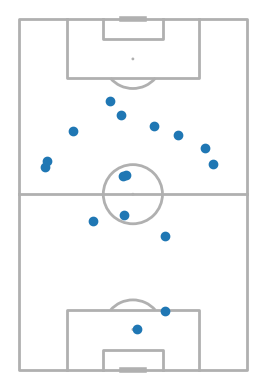

In [18]:
prom_position =src.get_players_average_positions(link)

fig, ax = plt.subplots()

pitch = VerticalPitch(pitch_type='opta')
pitch.draw(ax=ax)
pitch.scatter(prom_position[0].averageX, prom_position[0].averageY, ax=ax)


prom_position[0]

<Axes: >

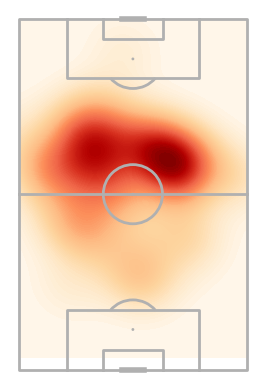

In [19]:
mapa = src.get_player_heatmap(link, player='Stiven Vega')
fig, ax = plt.subplots()

cmap = 'hot'
pitch = VerticalPitch(pitch_type='opta')
pitch.draw(ax=ax)
pitch.kdeplot(mapa.x,mapa.y,ax=ax,
              levels=100,
              fill=True,
              zorder=-1,
              shade_lowest=True,
              cmap='OrRd')


## Link Cleaner, llego aquí!!!

usa el maravilloso link cleaner para obtener datos sin errores en el scraper

In [20]:
#Limpiador de links, Usalo y veras la magia
def link_cleaner(link):
    str = link.replace("id:","")
    print(str)
    return str 


## DataFrames:
El escraper publica los datos en dataframes, la funcion iloc se usa para manejar los datos como si fuera un array, sin embargo puede manejarlo como objeto, ya que es un array de objetos.

In [25]:
#Implementacion ERIKFORA12

'''
ADVERTENCIA!!.
El ID del link es solo codigo de liga # ID_partida.

ejemplo:
  -link original: https://www.sofascore.com/granada-cadiz/NObsEAn#id:11369454
  -NObsEAn  #  11369454 -> sin espacios
  -quedara así: NObsEAn#11369454

- Sí lo pone de otra manera fallará.
'''
 
import traceback

#Datos
link = link_cleaner("https://www.sofascore.com/granada-cadiz/NObsEAn#id:11369454")
 
try:
  data = src.get_general_match_stats(link)
except:
  traceback.print_exc()  
#Nombre equipos
home = src.get_team_names(link)[0]
visitor = src.get_team_names(link)[1]

#tiros de esquina
home_kicks = data.iloc[5].homeValue
visitor_kicks = data.iloc[5].awayValue




https://www.sofascore.com/granada-cadiz/NObsEAn#11369454


In [26]:
print(home,": ", home_kicks)
print(visitor,": ",visitor_kicks)

Granada :  1.0
Cádiz :  7.0
